# Linear Regression

## Sandy Garcia

## Fuel Consuption ratings and Carbon Dioxide emission for new light-duty vehicles in Canada

Dataset contains variables listed below:

-MODELYEAR e.g. 2014
-MAKE e.g. Acura
-MODEL e.g. ILX
-VEHICLE CLASS e.g. SUV  
-ENGINE SIZE e.g. 4.7
-CYLINDER e.g. 6
-TRANSMISSION e.g. A6

## STEP #1: Import Libraries

In [77]:
import pandas as pd                   # Manipulate data and analysis
import numpy as np                    # Scientific Computing        
import matplotlib.pyplot as plt       # Data Visualisation and 2D plotting library
import seaborn as sns                 # Data Visualization library based on matplotlib (library for plotting in Python)
import pylab as pl
%matplotlib inline

## STEP #2: Import dataset 

In [78]:
# Read the data using pandas dataframe
df =  pd.read_csv('FuelConsumption.csv')

In [79]:
# Show the data head 
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [80]:
# Show the data tail
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


## STEP #3: Explore and Visualize the dataset (EDA)

In [81]:
# Summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [82]:
# Select some features to explore more
car_df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
car_df.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


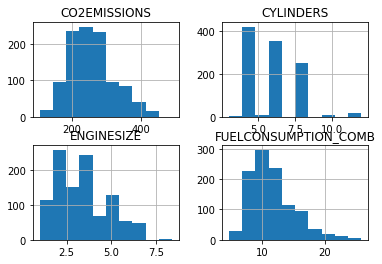

In [83]:
# Plot each of these features. Emission 200 to 300, most of the car cylinders are 4, 6, and 8. Engine size is 2 
car_df.hist()
plt.show()

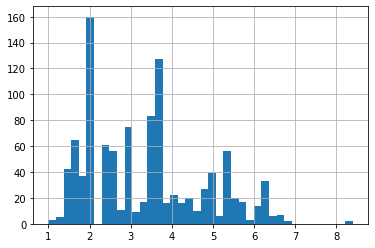

In [84]:
# Lots of 2 and 3.6 engine sizes
car_df['ENGINESIZE'].hist(bins = 40)

<function matplotlib.pyplot.show(*args, **kw)>

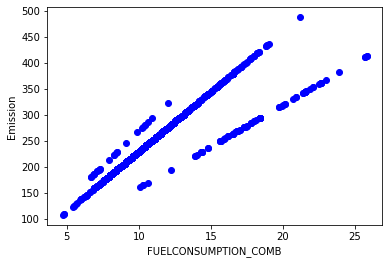

In [109]:
# Plot FUELCONSUMPTION_COMB vs the CO2EMISSIONS
plt.scatter(car_df.FUELCONSUMPTION_COMB, car_df.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

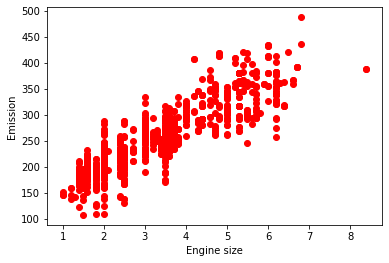

In [86]:
plt.scatter(car_df.ENGINESIZE, car_df.CO2EMISSIONS, color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

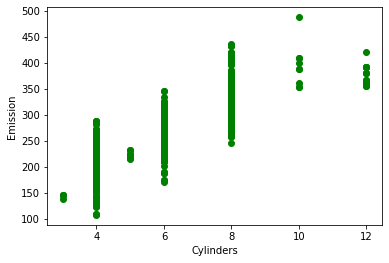

In [87]:
# Plot CYLINDER vs the Emission
plt.scatter(car_df.CYLINDERS, car_df.CO2EMISSIONS, color='green')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show

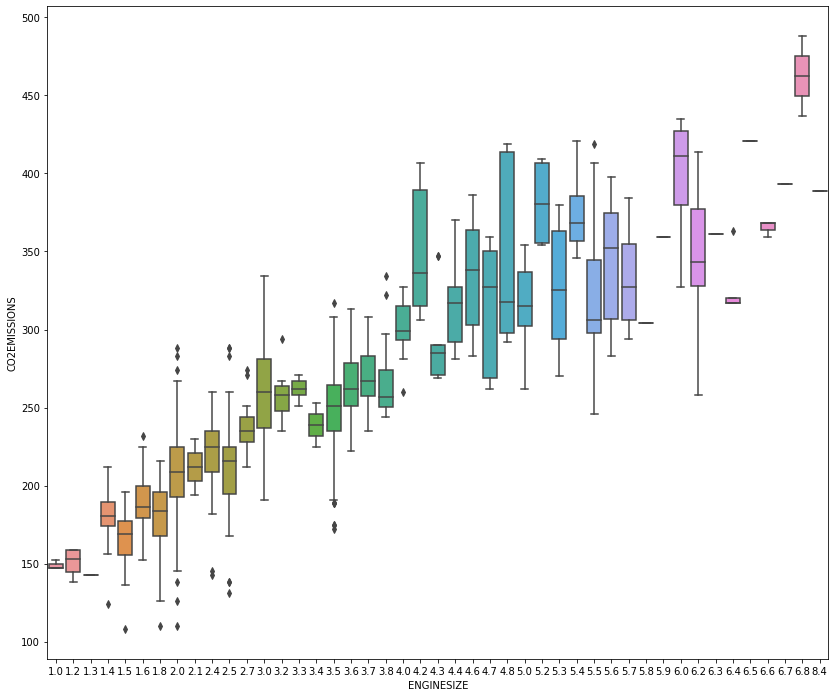

In [88]:
# Plot Engine size and emissions. Cylinders 8.4 have the highest emissions 470 approximately
plt.figure(figsize = (14, 12))
sns.boxplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = car_df)

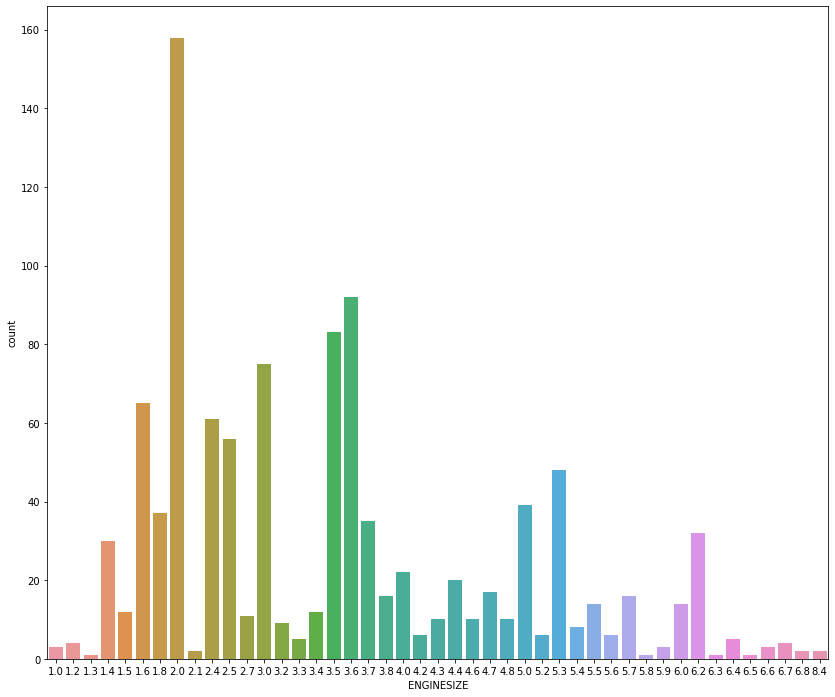

In [90]:
# Plot engine size
plt.figure(figsize = (14, 12))
sns.countplot(x = 'ENGINESIZE', data = car_df)

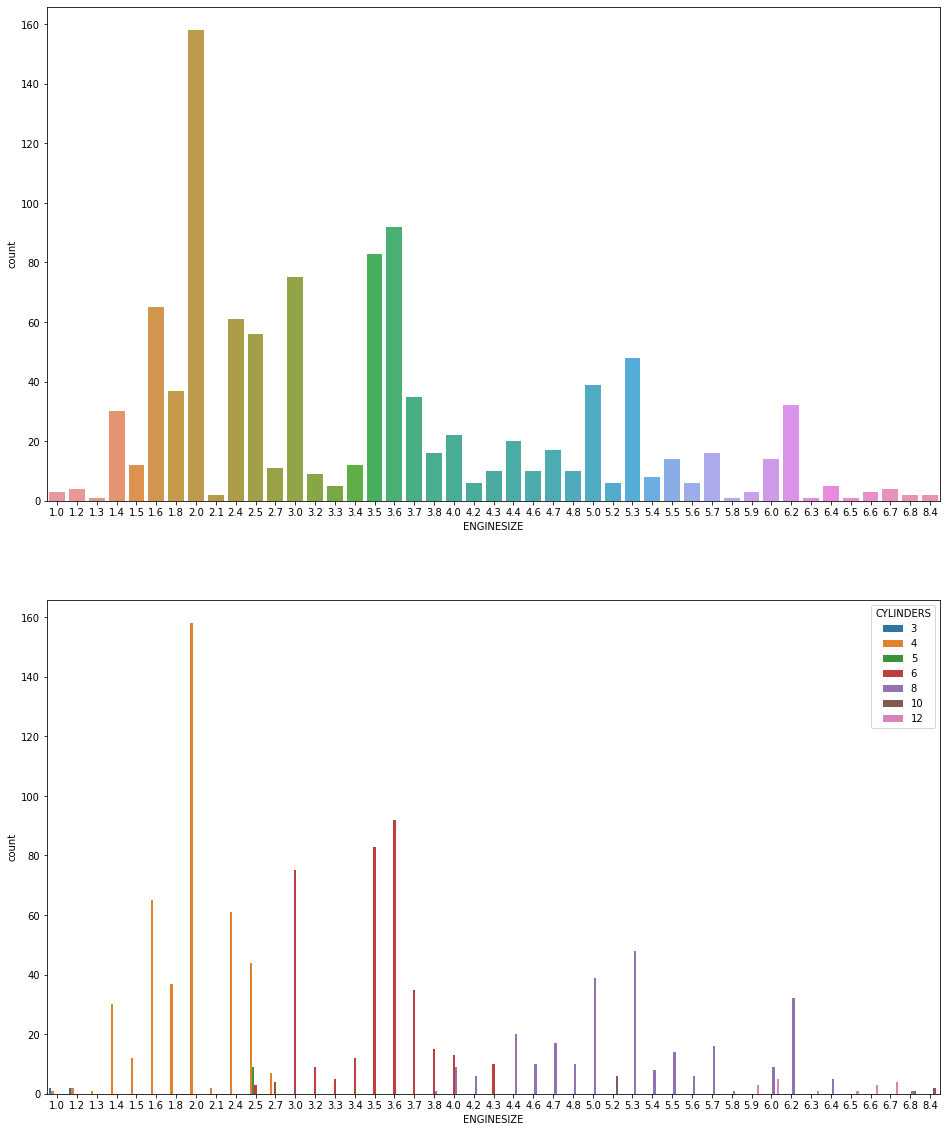

In [108]:
# Plot engine size and cylinders
plt.figure(figsize=[16,20])
plt.subplot(211)
sns.countplot(x = 'ENGINESIZE', data=car_df)
plt.subplot(212)
sns.countplot(x = 'ENGINESIZE', hue = 'CYLINDERS', data=car_df)

In [62]:
# Create train and test dataset. Split the dataset into train and test sets, 80% of the entire data for training and 20% for testing.
# Create a mask to select rows using np.random.rand() function
msk = np.random.rand(len(df)) < 0.8
train = car_df[msk]
test = car_df[~msk]


<function matplotlib.pyplot.show(*args, **kw)>

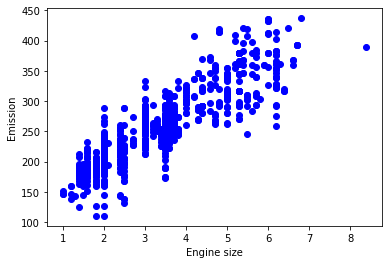

In [63]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

## STEP #4:  Model training data

In [64]:
# Use sklearn package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# The Coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.10389379]]
Intercept:  [125.25253029]


Text(0, 0.5, 'Emission')

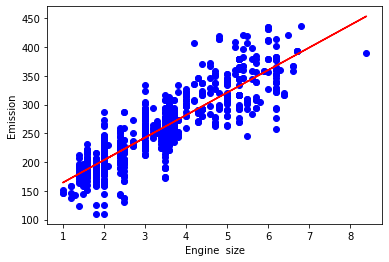

In [67]:
# In Linear regression Coefficient and Intercept are the parameters of the fit line
# Plot the fit line over the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine  size")
plt.ylabel("Emission")

## STEP #5: Model Evaluation

In [72]:
# Compare the actual values and predicted values to calculate the accuracy of the regression model
# There are different model evaluations metrics. Let uses MSE to calculate the accuracy of our model base on the test set.

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))

print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))

print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )



Mean absolute error: 23.51
Residual sum of squares (MSE): 932.74
R2-score: 0.68
